In [34]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imutils import paths
import os
import glob
import cv2
import numpy as np
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

imagePaths = list(paths.list_images("/content/drive/MyDrive/data"))
print(imagePaths)

['/content/drive/MyDrive/data/Normal/dysgraphia_467_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_990_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1358_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_858_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_754_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_821_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_850_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1356_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_803_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1337_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1029_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_859_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_844_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_927_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_984_no.jpg', '/content/drive/MyDrive/data/Normal/dysgraphia_1014_no.jpg', '/content/drive/MyDrive/data/Norma

In [5]:
print(os.path.split(imagePaths[0])[1].split('_')[-1].split('.')[0])

no


In [6]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]
    print(lable)
    lables.append(lable)
    #im_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img=Image.open(image)
    # img = cv2.imread(image)
    img=img.resize((256,256))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(10)
    #print(img.shape)
   # img = cv2.resize(img, (1024,1024))
    #img = img.reshape(224,224,1)
   # img = filters.sobel(img )
    img=np.array(img)
    print(img.shape)
    data.append(img)
    c=c+1


no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 3)
no
(256, 256, 

In [7]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(206, 256, 256, 3)


In [8]:
print(set(lables))

{'no', 'yes'}


In [9]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [55]:

#Splitting of dataset into training and test dataset
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)
#Evaluate the model
# print(trainX1.shape, trainY1.shape, data.shape, lables.shape)
# (trainX, valX, trainY, valY ) = train_test_split(trainX1, trainY1, test_size= 0.10, shuffle = True, random_state=42,stratify=trainY1)
#trainX=trainX.reshape(224,224,1)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
# valY=valY.reshape(len(valY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)
# print("X_Val shape", valX.shape)
# print("Y_Val shape", valY.shape)
#trainX /= 255
#valX /= 255
#testX /= 255

X_train shape (185, 256, 256, 3)
y_train shape (185, 1)
X_test shape (21, 256, 256, 3)
y_test shape (21, 1)


In [56]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
# valY= label.fit_transform(valY)
print(testY)

[1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


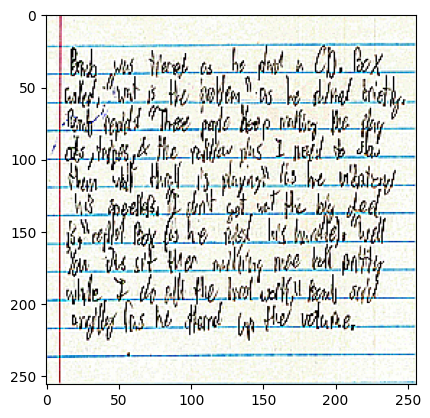

In [57]:
plt.imshow(trainX[126,:])
plt.show()

**VGG16 Model**


**Data Augmentation**

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
# data augmentation
datagen = ImageDataGenerator(
#        featurewise_center=False,  # set input mean to 0 over the dataset
#        samplewise_center=False,  # set each sample mean to 0
#        featurewise_std_normalization=False,  # divide inputs by std of the dataset
#        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        #rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        #horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(trainX)



# datagen.fit(valX)

**Transfer Learning using VGG16 (Imagenet)**

In [59]:
# model_3=Sequential()


# model_3.add(Flatten())
# model_3.add(Dense(512,activation='relu'))
# model_3.add(Dense(128,activation='relu'))
# model_3.add(Dense(64,activation='relu'))
# model_3.add(Dense(1,activation='sigmoid'))
model_3 = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(256, 256, 3)),
    MaxPool2D((2, 2), strides=2),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D((2, 2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(512,activation='LeakyReLU'),
    Dense(128,activation='relu'),
    Dense(64,activation='LeakyReLU'),
    Dense(32,activation='relu'),
    Dense(8,activation='LeakyReLU'),
    Dense(1,activation='sigmoid')

])

In [60]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 131072)           

In [61]:
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
#from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
opt = Adam(lr=0.0001)
model_3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [62]:
history_VGG=model_3.fit(
   datagen.flow(trainX,trainY, batch_size=32),
                              epochs = 50

)

Epoch 1/50
6/6 [==============================] - 4s 270ms/step - loss: 501.8597 - accuracy: 0.4649
Epoch 2/50
6/6 [==============================] - 3s 403ms/step - loss: 120.5397 - accuracy: 0.5027
Epoch 3/50
6/6 [==============================] - 4s 669ms/step - loss: 8.2556 - accuracy: 0.5243
Epoch 4/50
6/6 [==============================] - 3s 411ms/step - loss: 0.6591 - accuracy: 0.5568
Epoch 5/50
6/6 [==============================] - 3s 413ms/step - loss: 0.6752 - accuracy: 0.6162
Epoch 6/50
6/6 [==============================] - 3s 412ms/step - loss: 0.5467 - accuracy: 0.6108
Epoch 7/50
6/6 [==============================] - 3s 602ms/step - loss: 0.5313 - accuracy: 0.7081
Epoch 8/50
6/6 [==============================] - 3s 433ms/step - loss: 0.5083 - accuracy: 0.7081
Epoch 9/50
6/6 [==============================] - 3s 412ms/step - loss: 0.5230 - accuracy: 0.6811
Epoch 10/50
6/6 [==============================] - 3s 417ms/step - loss: 0.5106 - accuracy: 0.7189
Epoch 11/50
6/6

In [ ]:
# import sklearn.metrics as metrics
# from sklearn.metrics import accuracy_score
# scores = model_3.evaluate(valX, valY)
# print("\nLoss: %.2f%%" % (scores[0]*100))

10/10 [==============================] - 46s 5s/step - loss: 0.2451 - accuracy: 0.9875

Loss: 24.51%


In [63]:

acc = history_VGG.history['accuracy']


loss = history_VGG.history['loss']


In [64]:
print(len(loss))

50


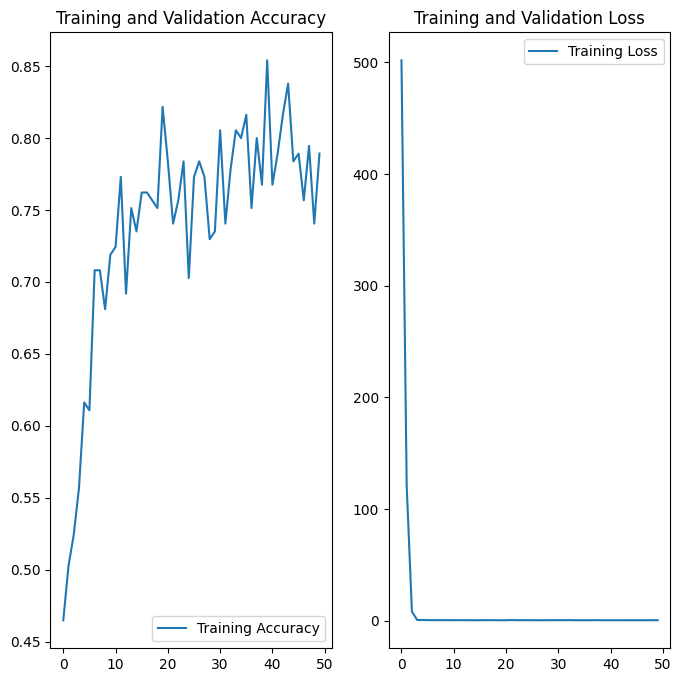

In [65]:
EPOCHS=50
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

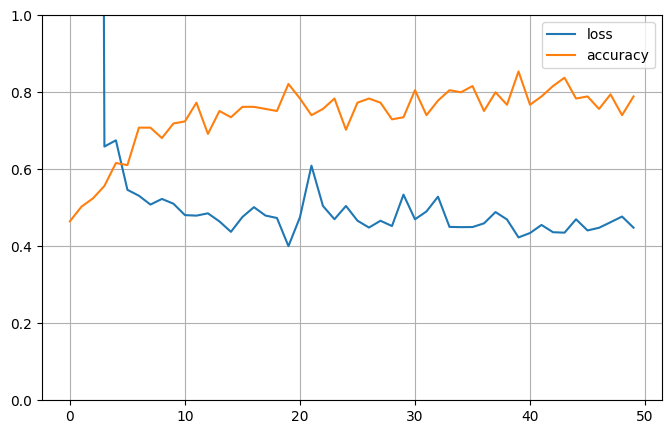

In [66]:
import pandas as pd
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [67]:
scores = model_3.evaluate(testX, testY)
print(scores)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 170ms/step - loss: 0.4746 - accuracy: 0.9048
[0.47462785243988037, 0.9047619104385376]

Accuracy: 90.48%


In [68]:
def evaluvate(model,x,y):
    y_predict=model.predict(x)
    y_predict=y_predict>0.5
    # print(y_predict)
    print(classification_report(y,y_predict))
    ConfusionMatrixDisplay.from_predictions(y,y_predict)

1/1 [==============================] - 0s 101ms/step
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.83      1.00      0.91        10

    accuracy                           0.90        21
   macro avg       0.92      0.91      0.90        21
weighted avg       0.92      0.90      0.90        21



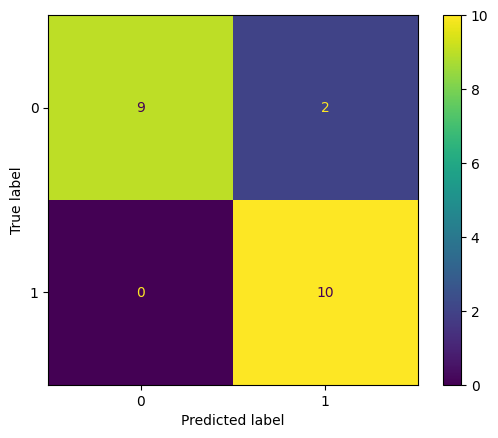

In [69]:
evaluvate(model_3,testX,testY)

In [70]:
import pickle

pickle.dump(model_3,open('Simple_conv.pkl','wb'))

In [ ]:
# Prediction
img2 = cv2.imread("temp.jpg")


img2 = cv2.resize(img2, (224,224))
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR)
img3=img2
data = np.array(img3)
print(data.shape)
im1 = data.reshape(1,224,224,3)
#feature_extractor=conv_base.predict(im1)

#features_1 = feature_extractor.reshape(feature_extractor.shape[0], -1)


l=model_3.predict(im1)
print('predicted label',l)


(224, 224, 3)
1/1 [==============================] - 0s 184ms/step
predicted label [[0.59871835]]


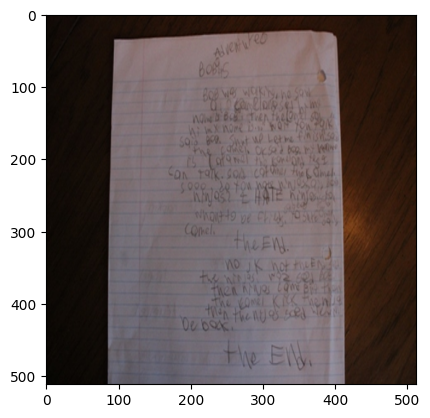

In [ ]:
img=Image.open('temp.jpg')
img=img.resize((512,512))

# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
# print(np.shape(img))

In [ ]:

enhancer = ImageEnhance.Sharpness(img)

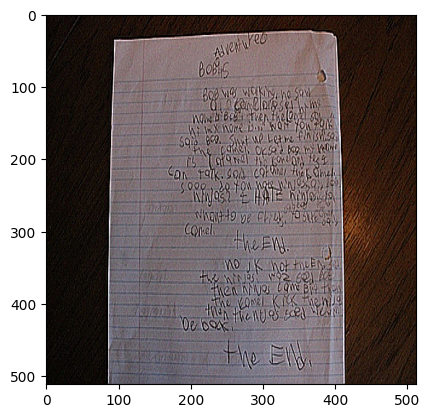

In [ ]:
im2=enhancer.enhance(15)
plt.imshow(im2)

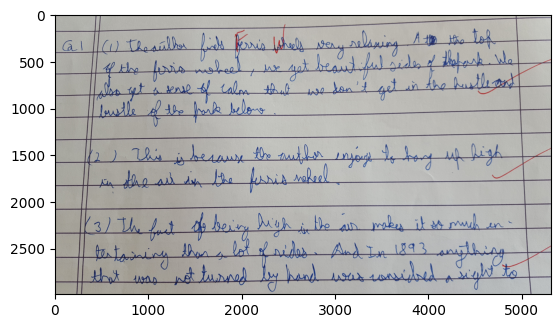

In [ ]:
kernel = np.array([[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)
plt.imshow(sharpened)

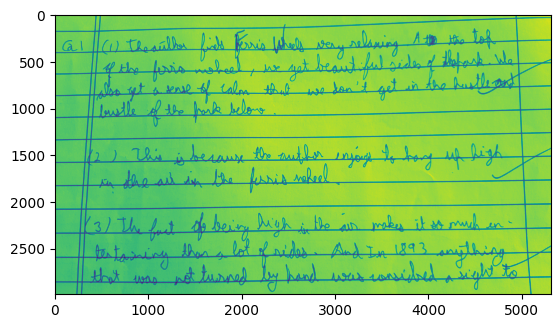

: 

In [ ]:
sharpened = cv2.GaussianBlur(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY), (5, 5), 0)
plt.imshow(sharpened)


In [ ]:
# def preProcessing(img):
#     imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     imgBlur = cv2.GaussianBlur(imgGray,(5,5),1)
#     imgCanny = cv2.Canny(imgGray,100,100)
#     kernel = np.ones((5,5))
#     imgDial = cv2.dilate(imgCanny,kernel,iterations=3)
#     imgThres = cv2.erode(imgDial,kernel,iterations=2)
#     return imgThres

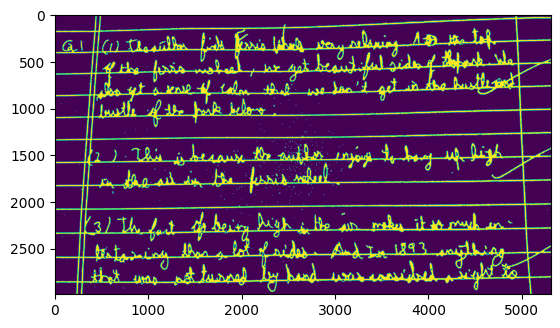

In [ ]:
# img2=preProcessing(img)
# plt.imshow(img2)

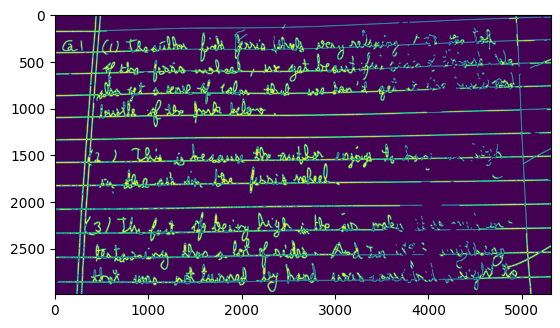

In [ ]:
# np.shape(img)

(2988, 5312)

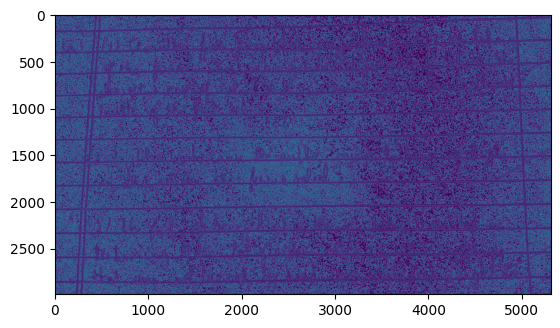

In [ ]:
# img2=cv2.Canny(img,100,150,apertureSize=5)
# plt.imshow(img2)